<a href="https://colab.research.google.com/github/sultankeles/Breast_Cancer_Diagnosis/blob/main/Breast_Cancer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Diagnosis**

The aim of this project is to create an image classification system which can detect breast cancer by stage and location.

# **1. Dataset Preparation**

In this section, INbreast dataset which is using for breat cancer diognasis has been processed. First of all, dataset has been downloaded and extracted. Afterwards, DICOM files which are medical image formats converted to JPGs and visualized sample converted images for check. Finally, XML files, included ROI (Region of Interest) informations which are identify the cancer region associated with each image, converted JSON format to make useable by Machine Learning models.

## 1.1. Download and Extract INbreast Dataset

*   Uploaded the INbreast_Release.zip file via Google Drive link.


    file_id    : The identification number of the dataset in Drive.
    zip_output : Specifies the name under which the downloaded .zip file will be saved on the local disk.
    extract_to : Defines the folder where the extracted .zip file will be saved.

*   If it is not downloaded, the .zip file is downloaded using the gdown library.

*   If not already extracted, the .zip file is extracted using the zipfile module.

In [ ]:
!pip install -q gdown

In [ ]:
import zipfile
import gdown
import os

file_id = "1746ML0cBtTYZb-O-kQ39gd9GfhvW0kt4"
zip_output = "INbreast_Release.zip"
extract_to = "/content/INbreast_Extracted"

if not os.path.exists(zip_output):
    gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_output, quiet=False)
else:
    print("ZIP file already exists!")


if not os.path.exists(extract_to):
    print("Extracting ...")
    with zipfile.ZipFile(zip_output, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("Extraction completed.")
else:
    print("Dataset already extracted!")

Downloading...
From (original): https://drive.google.com/uc?id=1746ML0cBtTYZb-O-kQ39gd9GfhvW0kt4
From (redirected): https://drive.google.com/uc?id=1746ML0cBtTYZb-O-kQ39gd9GfhvW0kt4&confirm=t&uuid=34e9fb82-7334-4467-8c0f-ca81f49ea325
To: /content/INbreast_Release.zip
100%|██████████| 2.01G/2.01G [00:35<00:00, 57.3MB/s]


Extracting ...
Extraction completed.


## 1.2 Convert DICOM to JPG

DICOM (Digital Imaging and Communications in Medicine) is a standard file format produced by medical imaging devices. To enable broader processing and visualization of the images, these files were converted to JPG format.

    dicom_dir      : Specifies the folder containing the DICOM files.
    jpg_output_dir : Folder where converted JPG files are saved.


The folder for saving JPG files was created using the function below. If the folder already exists, the operation continues without raising an error, thanks to the exist_ok=True parameter. In this way, the file system was prepared.
```
os.makedirs(jpg_output_dir, exist_ok=True)
```

During the image conversion process:

*   DICOM files were read using the `pydicom` library, and pixel data was extracted from the .dcm files.

*   `cv2.imwrite()` function was used to save the processed images in JPG format.

*   `Numpy (np)` was utilized to perform mathematical operations on the pixel data. The image values were normalized to the 0–255 range and converted to 8-bit format.

*   A progress bar was displayed using `tqdm`, allowing the user to track the progress of the conversion process.

In [ ]:
dicom_dir = "/content/INbreast_Extracted/INbreast Release 1.0/AllDICOMs"
jpg_output_dir = "/content/JPGs"

In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 75.1 MB/s eta 0:00:00


In [ ]:
import pydicom
import cv2
import numpy as np
from tqdm import tqdm

dicom_dir = "/content/INbreast_Extracted/INbreast Release 1.0/AllDICOMs"
jpg_output_dir = "/content/JPGs"
os.makedirs(jpg_output_dir, exist_ok = True)

def convert_dicom_to_jpg(dicom_path, jpg_path):
    dcm = pydicom.dcmread(dicom_path)
    img = dcm.pixel_array.astype(float)

    # Normalize to 0–255
    img = (np.maximum(img, 0) / img.max()) * 255.0
    img = np.uint8(img)

    # Save
    cv2.imwrite(jpg_path, img)


for filename in tqdm(os.listdir(dicom_dir)):
    if filename.endswith(".dcm"):
        file_id = filename.split("_")[0]
        dicom_path = os.path.join(dicom_dir, filename)
        jpg_path = os.path.join(jpg_output_dir, f"{file_id}.jpg")
        convert_dicom_to_jpg(dicom_path, jpg_path)

100%|██████████| 412/412 [00:56<00:00,  7.29it/s]


### 1.2.1. Display Sample Converted JPG Images


*   `IMG_SIZE` : Sets the resolution for the display.

All images were resized to 128×128 pixels to ensure consistency in visualization.

*   With the custom-defined function `show_sample_jpgs()`:
  *   The specified folder (`jpg_dir`) was scanned and filenames ending with .jpg were collected.

  *   The list was randomly shuffled, and a defined number of samples were selected.

  *    Each image was read using `cv2.imread()` and converted from BGR to RGB color format for accurate visualization with matplotlib.

  *   Images were resized to a standard size using `cv2.resize()` to maintain uniform layout.

  *   The selected images were displayed in a single row using `matplotlib.pyplot (plt)`.

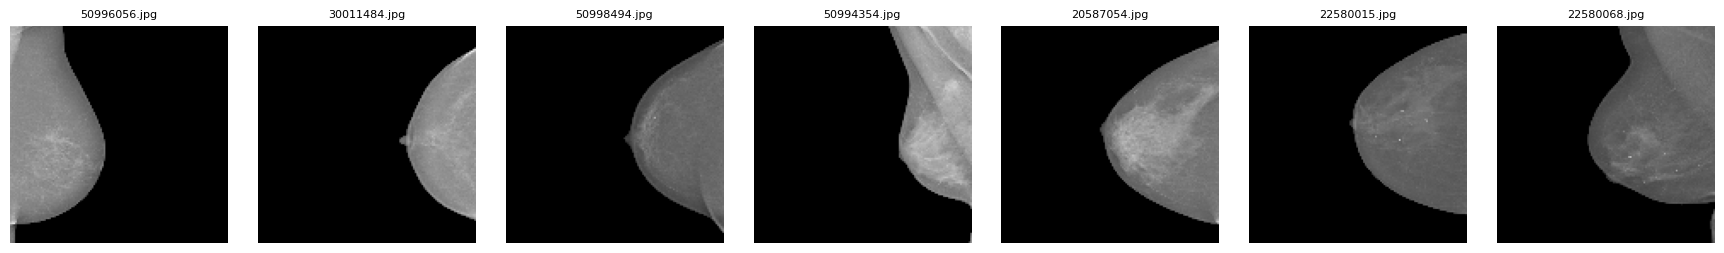

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_sample_jpgs(jpg_dir, samples = 6):
    images = [f for f in os.listdir(jpg_dir) if f.lower().endswith('.jpg')]
    random.shuffle(images)
    selected = images[:samples]

    plt.figure(figsize = (samples * 2.5, 2.5))
    for i, img_name in enumerate(selected):
        img_path = os.path.join(jpg_dir, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        plt.subplot(1, samples, i + 1)
        plt.imshow(img)
        plt.title(img_name[:15], fontsize = 8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

show_sample_jpgs("/content/JPGs", samples = 7)

## 1.3 Convert ROI XML to JSON

    xml_dir          : Directory where the XML files containing the ROI annotations are stored.
    output_json_path : Path where the converted JSON file will be saved.
    annotations      : A dictionary used to store structured ROI data for each image.

*   The helper function `parse_point()` was used to extract coordinate values representing the pixel locations of ROI points. It removes parentheses from the string and converts the values into integers.

*   All .xml files in the specified folder were scanned. Non-XML files were skipped, and remaining ones were parsed using the `ElementTree (ET)` library.

*   For each image, its corresponding XML file was read and traversed to access the ROI groups:

  * The XML tree was searched for <array> tags, where the ROI structures are located.

  * The relevant `key` tags were examined to extract the `Name` and `Point_px` values.

  * Using the `parse_point()` function, the coordinate string for each point was cleaned and converted into x and y values.

  * Each ROI was grouped under the corresponding image name (`image_id`).

  * The ROI data obtained for all images was collected in the annotations dictionary and saved as a .json file using the `json.dump()` function.


In [ ]:
import xml.etree.ElementTree as ET
import json
import re

xml_dir = "/content/INbreast_Extracted/INbreast Release 1.0/AllXML"
output_json_path = "/content/annotations.json"
annotations = {}

def parse_point(point_str):
    # Remove parentheses and split into float x, y
    x, y = re.findall(r"[\d.]+", point_str)
    return {"x": int(float(x)), "y": int(float(y))}

for file in os.listdir(xml_dir):
    if not file.endswith(".xml"):
        continue

    xml_path = os.path.join(xml_dir, file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    image_id = file.replace(".xml", "") + ".jpg"
    rois = []

    # Navigate to ROIs
    for roi_group in root.iter("array"):
        for roi in roi_group.findall("dict"):
            name = None
            points = []
            keys = list(roi)
            for i in range(len(keys)):
                if keys[i].tag == "key" and keys[i].text == "Name":
                    name = keys[i+1].text
                if keys[i].tag == "key" and keys[i].text == "Point_px":
                    px_array = keys[i+1].findall("string")
                    for p in px_array:
                        points.append(parse_point(p.text))
            if name and points:
                rois.append({
                    "label": name,
                    "points": points
                })

    if rois:
        annotations[image_id] = rois

# Save to JSON
with open(output_json_path, "w") as f:
    json.dump(annotations, f, indent=4)

print(f"ROI annotations parsed: {len(annotations)} images.")

ROI annotations parsed: 343 images.


# **2. Preprocessing**

In [ ]:
base_path = "/content/INbreast_Extracted/INbreast Release 1.0"

for root, dirs, files in os.walk(base_path):
    print(f"\n {root}")

    if dirs:
        print(f"   >Subdirectories: {dirs}")

    if files:
        for f in files[:5]:
            print(f"    - {f}")


 /content/INbreast_Extracted/INbreast Release 1.0
   >Subdirectories: ['PectoralMuscle', 'AllROI', 'AllXML', 'MedicalReports', 'AllDICOMs']
    - inbreast.pdf
    - README.txt
    - INbreast.xls
    - INbreast.csv

 /content/INbreast_Extracted/INbreast Release 1.0/PectoralMuscle
   >Subdirectories: ['Pectoral Muscle XML', 'Pectoral Muscle ROI']

 /content/INbreast_Extracted/INbreast Release 1.0/PectoralMuscle/Pectoral Muscle XML
    - 24065557_muscle.xml
    - 50996352_muscle.xml
    - 22671003_muscle.xml
    - 22678495_muscle.xml
    - 20587810_muscle.xml

 /content/INbreast_Extracted/INbreast Release 1.0/PectoralMuscle/Pectoral Muscle ROI
    - 22580270_muscle.roi
    - 20588536_muscle.roi
    - 53582710_muscle.roi
    - 20587226_muscle.roi
    - 53580638_muscle.roi

 /content/INbreast_Extracted/INbreast Release 1.0/AllROI
    - 53586751.roi
    - 24055779.roi
    - 24065584.roi
    - 24065833.roi
    - 22678646.roi

 /content/INbreast_Extracted/INbreast Release 1.0/AllXML
    - 225

## 2.1. Data Reading and Review

The INbreast dataset is provided in .csv format and is separated by a semicolon (;).

Therefore, when reading the dataset with pandas, the sep=";" parameter is given.

Otherwise, the columns are separated incorrectly and the data is loaded incorrectly.

In [ ]:
import pandas as pd

csv_path = "/content/INbreast_Extracted/INbreast Release 1.0/INbreast.csv"
df = pd.read_csv(csv_path, sep = ";")
df["filename"] = df["File Name"].astype(str) + ".jpg"

df_clean = df[["filename", "Laterality", "View", "ACR", "Bi-Rads"]].copy()
df_clean.columns = ["filename", "laterality", "view", "acr_density", "birads_label"]

df_clean.head()

,filename,laterality,view,acr_density,birads_label
0,22678622.jpg,R,CC,4,1
1,22678646.jpg,L,CC,4,3
2,22678670.jpg,R,MLO,4,1
3,22678694.jpg,L,MLO,4,3
4,22614074.jpg,R,CC,2,5


## 2.2. BI-RADS Class Distribution

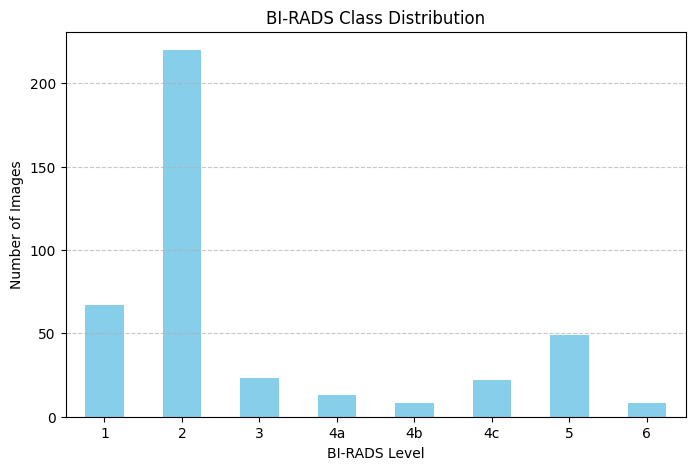

In [ ]:
import matplotlib.pyplot as plt

# Count class distribution
birads_counts = df_clean["birads_label"].value_counts().sort_index()

# Visualize
plt.figure(figsize = (8, 5))
birads_counts.plot(kind = "bar", color = "skyblue")
plt.title("BI-RADS Class Distribution")
plt.xlabel("BI-RADS Level")
plt.ylabel("Number of Images")
plt.xticks(rotation = 0)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show()

### 2.2.1. Sorting Images into Folders Based on BI-RADS Levels

* The .jpg files were copied into folders based on their classes using the df_clean DataFrame.

* Folder names were given as: "BI-RADS-1", "BI-RADS-2", "BI-RADS-3", "BI-RADS-4a", "BI-RADS-4b", "BI-RADS-4ac", "BI-RADS-5", "BI-RADS-6".

In [ ]:
import shutil
from tqdm import tqdm

img_source_dir = "/content/JPGs"
output_dir = "/content/BI-RADS_split"
os.makedirs(output_dir, exist_ok=True)

for _, row in tqdm(df_clean.iterrows(), total=len(df_clean), desc = "Organizing images"):
    label = str(row["birads_label"]).strip()
    src = os.path.join(img_source_dir, row["filename"])
    dst_dir = os.path.join(output_dir, f"BIRADS_{label}")
    os.makedirs(dst_dir, exist_ok=True)
    dst = os.path.join(dst_dir, row["filename"])

    if os.path.exists(src):
        shutil.copy(src, dst)

Organizing images: 100%|██████████| 410/410 [00:00<00:00, 986.56it/s] 


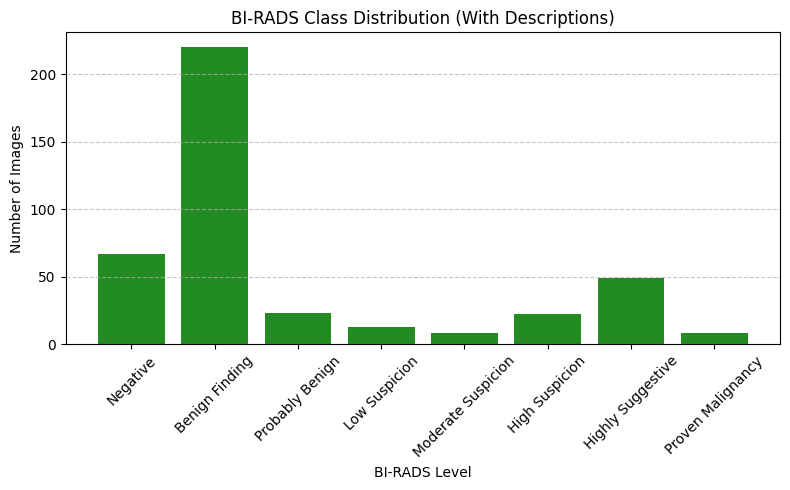

In [ ]:
import matplotlib.pyplot as plt

# Label descriptions
label_map = {
    "1": "Negative",
    "2": "Benign Finding",
    "3": "Probably Benign",
    "4a": "Low Suspicion",
    "4b": "Moderate Suspicion",
    "4c": "High Suspicion",
    "5": "Highly Suggestive",
    "6": "Proven Malignancy"
}

def extract_label(folder_name):
    return folder_name.split("_")[-1].lower()

class_counts = {
    class_name: len([f for f in os.listdir(os.path.join(output_dir, class_name)) if f.endswith(".jpg")])
    for class_name in sorted(os.listdir(output_dir)) if class_name.startswith("BIRADS_")
}

sorted_labels = sorted(class_counts.keys(), key=lambda x: extract_label(x))

# Plot the chart
plt.figure(figsize=(8, 5))
plt.bar(
    [label_map.get(extract_label(l), extract_label(l)) for l in sorted_labels],
    [class_counts[l] for l in sorted_labels],
    color = "forestgreen"
)
plt.title("BI-RADS Class Distribution (With Descriptions)")
plt.xlabel("BI-RADS Level")
plt.ylabel("Number of Images")
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

# **3. Augmentation**

Nested break statements were handled correctly.

The production count was controlled directly using a while loop.

Simplified using print instead of tqdm (can be added again if needed).

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

datagen = ImageDataGenerator(
    rotation_range = 2,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

target_count = 225
base_dir = output_dir  # /content/BI-RADS_split

for class_name in sorted(os.listdir(base_dir)):
    if class_name == "BIRADS_2":
        continue

    class_path = os.path.join(base_dir, class_name)
    images = [f for f in os.listdir(class_path) if f.endswith(".jpg")]
    to_generate = target_count - len(images)

    if to_generate <= 0:
        continue

    generated = 0
    while generated < to_generate:
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size = (224, 224))
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)

            for _ in datagen.flow(x, batch_size = 1,
                                  save_to_dir = class_path,
                                  save_prefix = "aug", save_format = "jpg"):
                generated += 1
                if generated >= to_generate:
                    break
            if generated >= to_generate:
                break

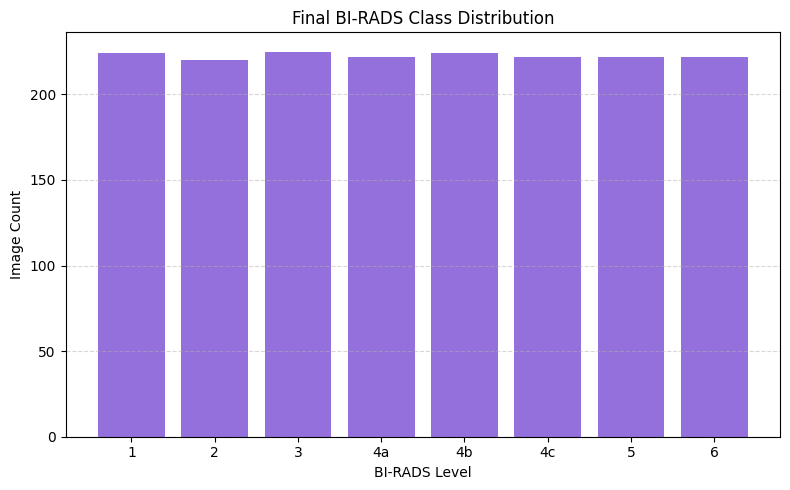

In [ ]:
birads_counts_aug = {
    name: len([f for f in os.listdir(os.path.join(base_dir, name)) if f.endswith(".jpg")])
    for name in sorted(os.listdir(base_dir)) if name.startswith("BIRADS_")
}

x_labels = [extract_label(k) for k in birads_counts_aug.keys()]
y_counts = list(birads_counts_aug.values())

plt.figure(figsize=(8, 5))
plt.bar(x_labels, y_counts, color="mediumpurple")
plt.title("Final BI-RADS Class Distribution")
plt.xlabel("BI-RADS Level")
plt.ylabel("Image Count")
plt.grid(axis = "y", linestyle = "--", alpha = 0.5)
plt.tight_layout()
plt.show()

## 3.1. Show Sample Augmented Images

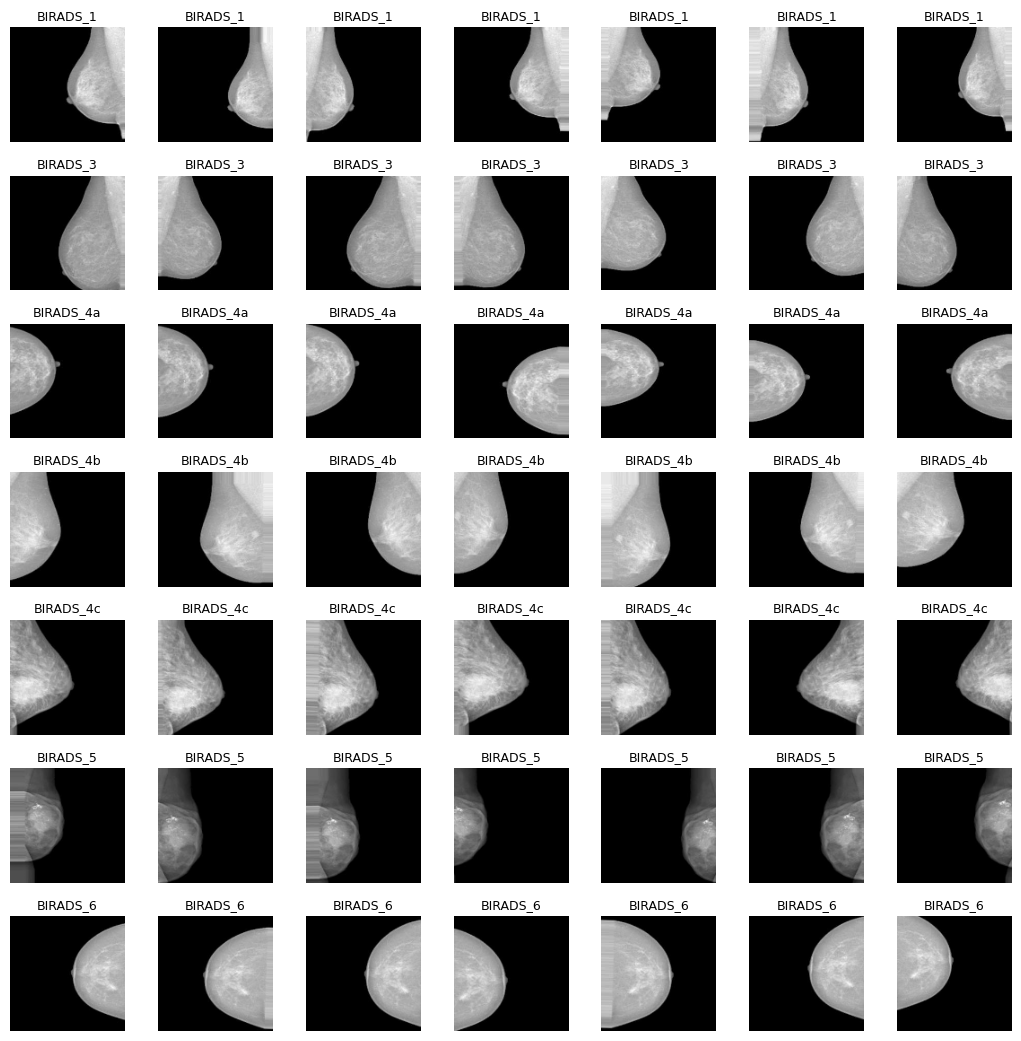

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_augmented_images_from_folders(base_dir, class_filter = None, samples = 7):
    class_folders = [f for f in os.listdir(base_dir)
                     if os.path.isdir(os.path.join(base_dir, f)) and f.startswith("BIRADS_")]

    if class_filter:
        class_folders = [f for f in class_folders if f in class_filter]

    rows = len(class_folders)
    cols = samples
    plt.figure(figsize = (cols * 1.5, rows * 1.5))
    i = 1

    for class_name in sorted(class_folders):
        class_path = os.path.join(base_dir, class_name)
        images = [f for f in os.listdir(class_path) if f.startswith("aug") and f.endswith(".jpg")]
        random.shuffle(images)

        for img_name in images[:samples]:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(class_name, fontsize = 9)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()

show_augmented_images_from_folders(base_dir="/content/BI-RADS_split")

# **4. Dataset Splitting**

In [ ]:
import os
import cv2
import numpy as np

original_dir = "/content/BI-RADS_split"

all_classes = sorted(os.listdir(original_dir))

label_map = {}
for idx, label in enumerate(all_classes):
    label_map[label] = idx

img_size = 224

X = []
y = []

for label in all_classes:
    class_path = os.path.join(original_dir, label)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            img = img / 255.0
            X.append(img)
            y.append(label_map[label])


X = np.array(X, dtype=np.float32)
y = np.array(y)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1783, 224, 224, 3)
y shape: (1783,)


## 4.1. Train-Test-Split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1426, 224, 224, 3)
y_train shape: (1426,)


# **5. Custom CNN Model**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

## 5.1. Model Architecture

In [ ]:
img_size = 224
num_classes = 8

if y_train.ndim != 2:
    y_train = to_categorical(y_train, num_classes = num_classes)
if y_test.ndim != 2:
    y_test = to_categorical(y_test, num_classes = num_classes)

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (img_size, img_size, 3)),
    MaxPooling2D(pool_size = (2, 2)),

    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(num_classes, activation = 'softmax')
])

# Compile
model_cnn.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

## 5.2. Training

In [ ]:
# EarlyStopping
early_stop = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    restore_best_weights = True
)

In [ ]:
# ModelCheckpoint
checkpoint = ModelCheckpoint(
    "best_model_cnn.keras",
    monitor = 'val_accuracy',
    save_best_only = True,
    verbose = 1
)

In [ ]:
import time
start = time.time()

history_cnn = model_cnn.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 50,
    batch_size = 32,
    callbacks = [early_stop, checkpoint],
    verbose = 1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.2406 - loss: 2.4925
Epoch 1: val_accuracy improved from -inf to 0.51541, saving model to best_model_cnn.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 181ms/step - accuracy: 0.2424 - loss: 2.4817 - val_accuracy: 0.5154 - val_loss: 1.4502
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5358 - loss: 1.3261
Epoch 2: val_accuracy improved from 0.51541 to 0.59944, saving model to best_model_cnn.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5366 - loss: 1.3244 - val_accuracy: 0.5994 - val_loss: 1.1379
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6589 - loss: 0.9880
Epoch 3: val_accuracy improved from 0.59944 to 0.66387, saving model to best_model_cnn.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6589 - loss: 0.9880 - val_accuracy: 0.6639 - val_loss: 1.0490
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7312 - loss: 0.7968
Epoch 4: val_accuracy improved fr

## 5.3. Evaluation

In [ ]:
from tensorflow.keras.models import load_model

model_cnn.load_weights("best_model_cnn.keras")
loss, acc = model_cnn.evaluate(X_test, y_test, verbose = 1)
print(f"\n Test Accuracy: {acc:.4f} — Test Loss: {loss:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7170 - loss: 0.9887

 Test Accuracy: 0.7227 — Test Loss: 1.0111


## 5.4. Prediction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
best_model = load_model("best_model_cnn.keras")

# Prediction
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis = 1)

# Ground truth
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis = 1)
else:
    y_true = y_test

class_names = ["1", "2", "3", "4a", "4b", "4c", "5", "6"]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


## 5.5. Classification Report

In [ ]:
print("Custom CNN Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

Custom CNN Classification Report:

              precision    recall  f1-score   support

           1       0.67      0.53      0.59        45
           2       0.47      0.41      0.44        44
           3       0.80      0.71      0.75        45
          4a       0.84      0.84      0.84        44
          4b       0.95      0.93      0.94        45
          4c       0.78      0.84      0.81        45
           5       0.66      0.52      0.58        44
           6       0.62      0.98      0.76        45

    accuracy                           0.72       357
   macro avg       0.72      0.72      0.71       357
weighted avg       0.72      0.72      0.72       357



## 5.6. Confusion Matrix

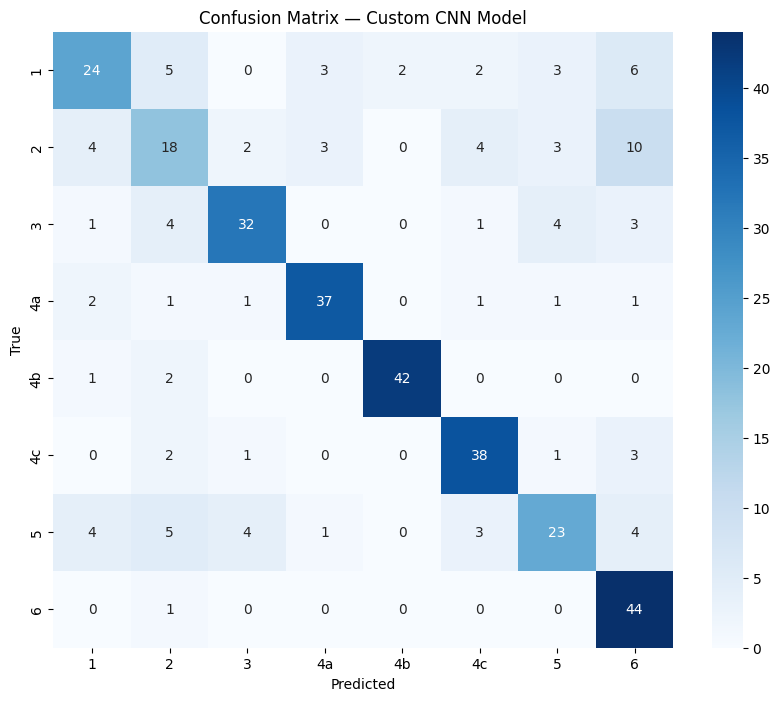

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
plt.title("Confusion Matrix — Custom CNN Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 5.7. Accuracy & Loss Graphs

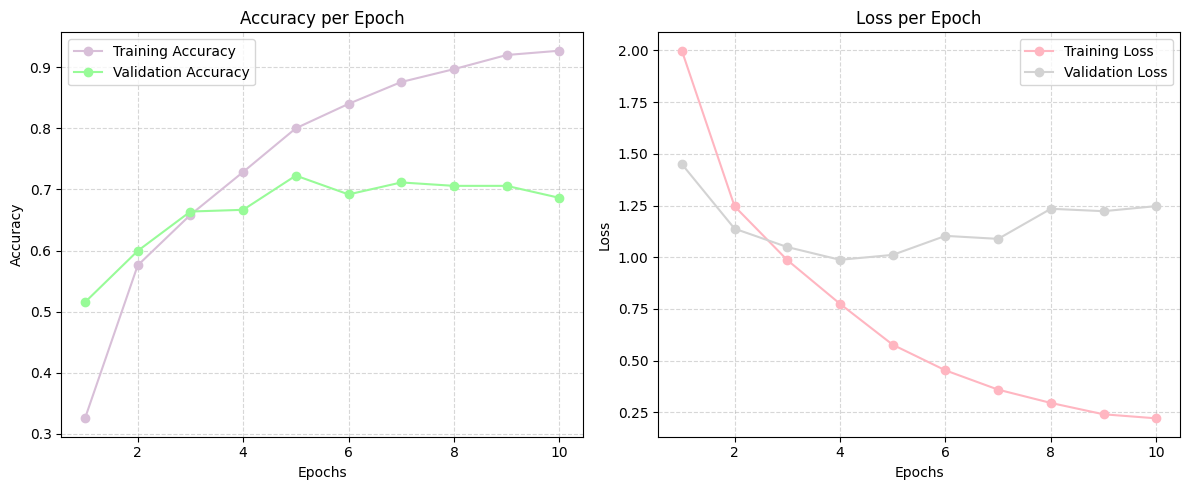

In [ ]:
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, color = 'thistle', marker = 'o', label = 'Training Accuracy')
plt.plot(epochs, val_acc, color = 'palegreen', marker = 'o', label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha = 0.5, linestyle = '--')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color = 'lightpink', marker = 'o', label = 'Training Loss')
plt.plot(epochs, val_loss, color = 'lightgray', marker = 'o', label = 'Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha = 0.5, linestyle = '--')

plt.tight_layout()
plt.show()

# **6. DenseNet121**

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## 6.1. Model Architecture

In [ ]:
input_shape = (224, 224, 3)
num_classes = 8

base_model = DenseNet121(weights = 'imagenet', include_top = False, input_tensor = Input(shape = input_shape))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation = 'softmax')(x)

# Final model
model_densenet = Model(inputs = base_model.input, outputs = output)

# Compile
model_densenet.compile(
    optimizer = Adam(learning_rate = 1e-4),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model_densenet.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 13,461,192 (51.35 MB)

 Trainable params: 6,423,688 (24.50 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

## 6.2. Training

In [ ]:
early_stop = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    restore_best_weights = True
    )

checkpoint = ModelCheckpoint(
    "best_model_densenet.keras",
    monitor = 'val_accuracy',
    save_best_only = True,
    verbose = 1
    )

In [ ]:
import time
start = time.time()

history_densenet = model_densenet.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    batch_size = 32,
    callbacks = [early_stop, checkpoint],
    verbose = 1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.5083 - loss: 1.8745
Epoch 1: val_accuracy improved from -inf to 0.83754, saving model to best_model_densenet.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 844ms/step - accuracy: 0.5117 - loss: 1.8597 - val_accuracy: 0.8375 - val_loss: 0.5112
Epoch 2/100
44/45 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8318 - loss: 0.5227
Epoch 2: val_accuracy improved from 0.83754 to 0.87115, saving model to best_model_densenet.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.8323 - loss: 0.5222 - val_accuracy: 0.8711 - val_loss: 0.4246
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8466 - loss: 0.4628
Epoch 3: val_accuracy did not improve from 0.87115
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.8470 - loss: 0.4619 - val_accuracy: 0.8487 - val_loss: 0.4260
Epoch 4/100
44/45 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8743 - loss: 0.3710
Epoch 4: val_accuracy did not improve from 0.87115
45/45 ━━━

## 6.3. Evaluation

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("best_model_densenet.keras")

loss, acc = model.evaluate(X_test, y_test, verbose = 1)
print(f"\nTest Accuracy: {acc:.4f} — Test Loss: {loss:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 568ms/step - accuracy: 0.8768 - loss: 0.4242

Test Accuracy: 0.8711 — Test Loss: 0.4246


## 6.4. Prediction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
best_model = load_model("best_model_densenet.keras")

y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

class_names = ["1", "2", "3", "4a", "4b", "4c", "5", "6"]

12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 981ms/step


## 6.5. Classification Report

In [ ]:
print("DenseNet121 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

DenseNet121 Classification Report:

              precision    recall  f1-score   support

           1       0.89      0.71      0.79        45
           2       0.50      0.77      0.61        44
           3       0.93      0.87      0.90        45
          4a       0.98      0.95      0.97        44
          4b       1.00      1.00      1.00        45
          4c       0.93      0.89      0.91        45
           5       0.97      0.80      0.88        44
           6       1.00      0.98      0.99        45

    accuracy                           0.87       357
   macro avg       0.90      0.87      0.88       357
weighted avg       0.90      0.87      0.88       357



## 6.6. Confusion Matrix

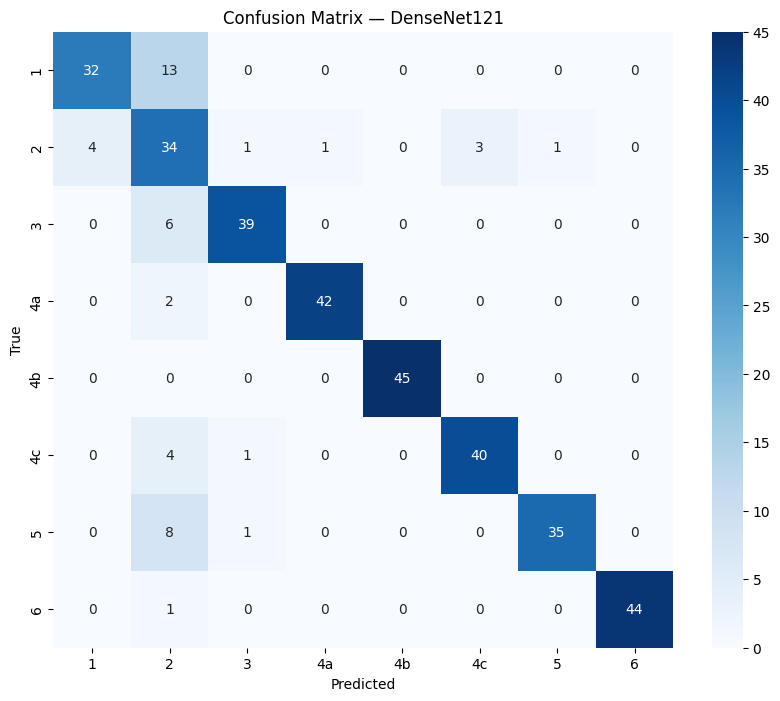

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
plt.title("Confusion Matrix — DenseNet121")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 6.7. Accuracy & Loss Graphs

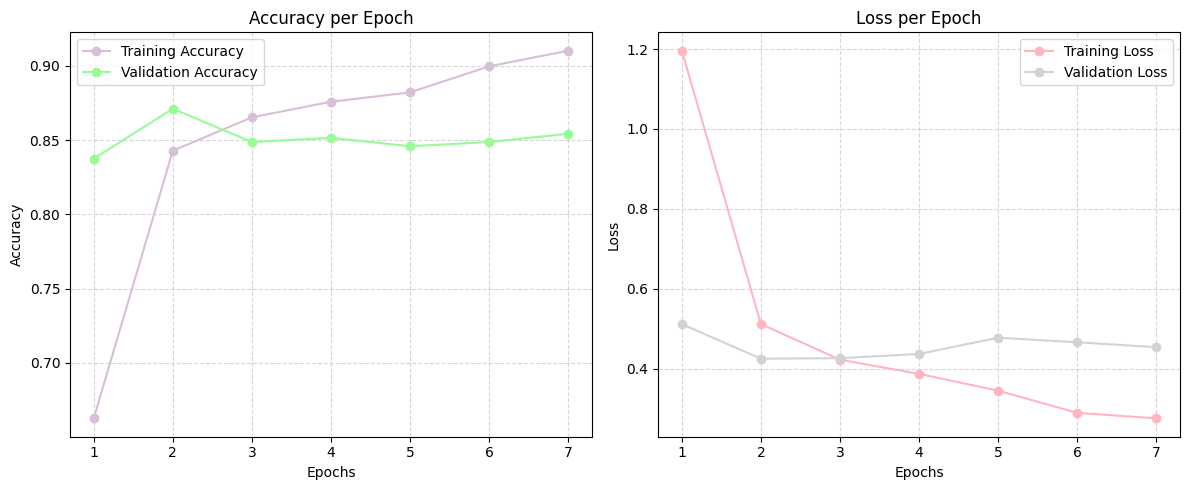

In [ ]:
import matplotlib.pyplot as plt

acc = history_densenet.history['accuracy']
val_acc = history_densenet.history['val_accuracy']
loss = history_densenet.history['loss']
val_loss = history_densenet.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, color = 'thistle', marker = 'o', label = 'Training Accuracy')
plt.plot(epochs, val_acc, color = 'palegreen', marker = 'o', label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha = 0.5, linestyle = '--')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color = 'lightpink', marker='o', label = 'Training Loss')
plt.plot(epochs, val_loss, color = 'lightgray', marker = 'o', label = 'Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha = 0.5, linestyle = '--')

plt.tight_layout()
plt.show()

# **7. VGG16**

## 7.1. Feature Extraction

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

input_shape = (224, 224, 3)
num_classes = 8

base_model = VGG16(weights = 'imagenet', include_top = False, input_tensor = Input(shape = input_shape))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation = 'softmax')(x)

# Final model
model_vgg16 = Model(inputs = base_model.input, outputs = output)

# Compile
model_vgg16.compile(
    optimizer = Adam(learning_rate = 1e-4),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model_vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,927,112 (68.39 MB)

 Trainable params: 3,212,424 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## 7.2. Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 5, restore_best_weights = True)

checkpoint = ModelCheckpoint(
    "best_model_vgg16.keras",
    monitor = 'val_accuracy',
    save_best_only = True,
    verbose = 1
)

In [ ]:
import time
start = time.time()

history_vgg16 = model_vgg16.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    batch_size = 32,
    callbacks = [early_stop, checkpoint],
    verbose = 1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.3375 - loss: 1.8750
Epoch 1: val_accuracy improved from -inf to 0.75910, saving model to best_model_vgg16.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 574ms/step - accuracy: 0.3406 - loss: 1.8677 - val_accuracy: 0.7591 - val_loss: 0.9936
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.7119 - loss: 0.9723
Epoch 2: val_accuracy improved from 0.75910 to 0.81793, saving model to best_model_vgg16.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.7127 - loss: 0.9706 - val_accuracy: 0.8179 - val_loss: 0.6825
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.8053 - loss: 0.7225
Epoch 3: val_accuracy did not improve from 0.81793
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step - accuracy: 0.8056 - loss: 0.7220 - val_accuracy: 0.8179 - val_loss: 0.6309
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.8513 - loss: 0.6111
Epoch 4: val_accuracy improved from 0.81793 to 0.84034, savi

## 7.3. Evaluation

In [ ]:
from tensorflow.keras.models import load_model

best_model_vgg16 = load_model("best_model_vgg16.keras")
loss, acc = model_vgg16.evaluate(X_test, y_test, verbose=1)
print(f"\n Test Accuracy: {acc:.4f} — Test Loss: {loss:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.8586 - loss: 0.5058

 Test Accuracy: 0.8627 — Test Loss: 0.5105


## 7.4. Prediction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
best_model = load_model("best_model_vgg16.keras")

y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

class_names = ["1", "2", "3", "4a", "4b", "4c", "5", "6"]

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step


## 7.5. Classification Report

In [ ]:
print("VGG16 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

VGG16 Classification Report:

              precision    recall  f1-score   support

           1       0.91      0.67      0.77        45
           2       0.56      0.80      0.65        44
           3       0.83      0.84      0.84        45
          4a       0.98      0.95      0.97        44
          4b       0.98      1.00      0.99        45
          4c       0.91      0.89      0.90        45
           5       0.92      0.77      0.84        44
           6       0.98      0.98      0.98        45

    accuracy                           0.86       357
   macro avg       0.88      0.86      0.87       357
weighted avg       0.88      0.86      0.87       357



## 7.6. Confusion Matrix

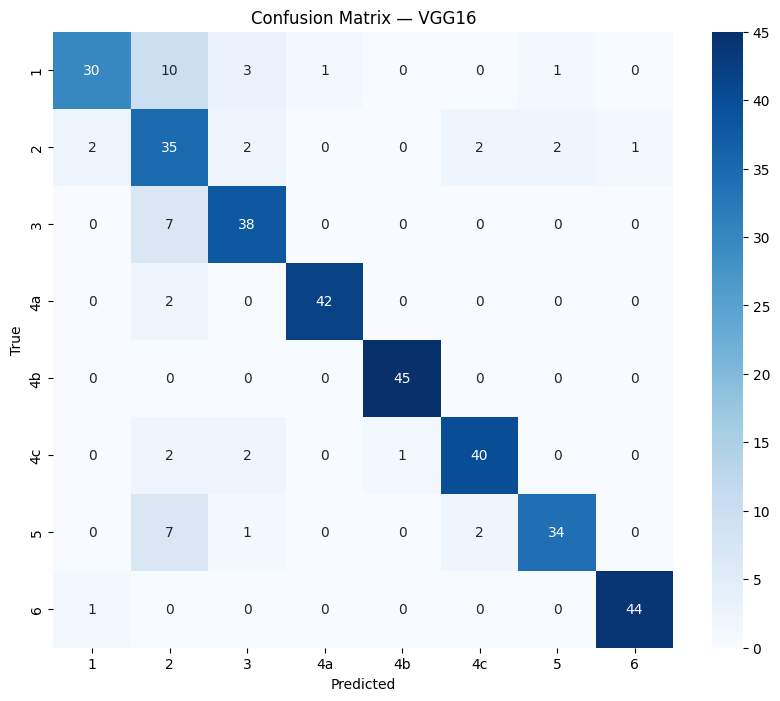

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
plt.title("Confusion Matrix — VGG16")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 7.7. Accuracy & Loss Graphs

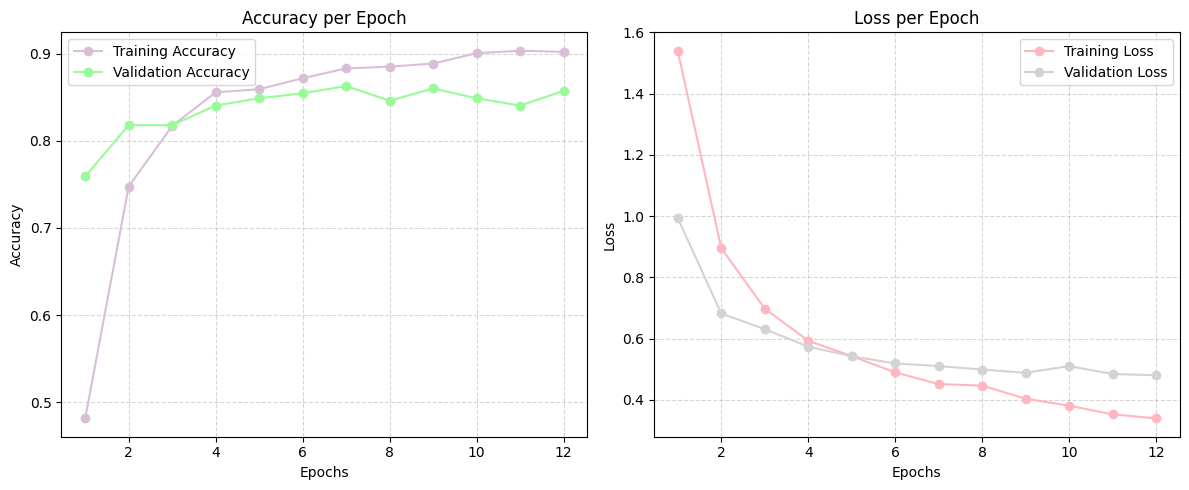

In [ ]:
import matplotlib.pyplot as plt

acc = history_vgg16.history['accuracy']
val_acc = history_vgg16.history['val_accuracy']
loss = history_vgg16.history['loss']
val_loss = history_vgg16.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, color = 'thistle', marker = 'o', label = 'Training Accuracy')
plt.plot(epochs, val_acc, color = 'palegreen', marker = 'o', label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha = 0.5, linestyle = '--')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color = 'lightpink', marker='o', label = 'Training Loss')
plt.plot(epochs, val_loss, color = 'lightgray', marker = 'o', label = 'Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha = 0.5, linestyle = '--')

plt.tight_layout()
plt.show()

# **8. EfficientNetB0**

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## 8.1. Feature Extraction

In [ ]:
input_shape = (224, 224, 3)
num_classes = 8

base_model = EfficientNetB0(weights = 'imagenet', include_top = False, input_tensor = Input(shape = input_shape))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation = 'softmax')(x)

# Final model
model_efficientnet = Model(inputs = base_model.input, outputs = output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Compile
model_efficientnet.compile(
    optimizer = Adam(learning_rate = 1e-4),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model_efficientnet.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,214,571 (16.08 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

## 8.2. Training

In [ ]:
early_stop = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    restore_best_weights = True
    )
checkpoint = ModelCheckpoint(
    "best_model_efficientnet.keras",
    monitor = 'val_accuracy',
    save_best_only = True,
    verbose = 1
    )

In [ ]:
import time
start = time.time()

history_efficient = model_efficientnet.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    batch_size = 32,
    callbacks = [early_stop, checkpoint],
    verbose = 1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.1490 - loss: 2.1192
Epoch 1: val_accuracy improved from -inf to 0.12325, saving model to best_model_efficientnet.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 45s 522ms/step - accuracy: 0.1486 - loss: 2.1190 - val_accuracy: 0.1232 - val_loss: 2.0809
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1341 - loss: 2.0862
Epoch 2: val_accuracy did not improve from 0.12325
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.1341 - loss: 2.0862 - val_accuracy: 0.1232 - val_loss: 2.0798
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1264 - loss: 2.0998
Epoch 3: val_accuracy improved from 0.12325 to 0.12605, saving model to best_model_efficientnet.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.1262 - loss: 2.0998 - val_accuracy: 0.1261 - val_loss: 2.0799
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1172 - loss: 2.0966
Epoch 4: val_accuracy did not improve from 0.12605
45

## 8.3. Evaluation

In [ ]:
from tensorflow.keras.models import load_model

best_model_efficientnet = load_model("best_model_efficientnet.keras")
loss, acc = model_efficientnet.evaluate(X_test, y_test, verbose=1)
print(f"\n Test Accuracy: {acc:.4f} — Test Loss: {loss:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.1222 - loss: 2.0794

 Test Accuracy: 0.1261 — Test Loss: 2.0799


## 8.4. Prediction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
best_model = load_model("best_model_efficientnet.keras")

y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

class_names = ["1", "2", "3", "4a", "4b", "4c", "5", "6"]

12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 547ms/step


## 8.5. Classification Report

In [ ]:
print("EfficientNetB0 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

EfficientNetB0 Classification Report:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        45
          4a       0.00      0.00      0.00        44
          4b       0.00      0.00      0.00        45
          4c       0.00      0.00      0.00        45
           5       0.00      0.00      0.00        44
           6       0.13      1.00      0.22        45

    accuracy                           0.13       357
   macro avg       0.02      0.12      0.03       357
weighted avg       0.02      0.13      0.03       357



## 8.6. Confusion Matrix

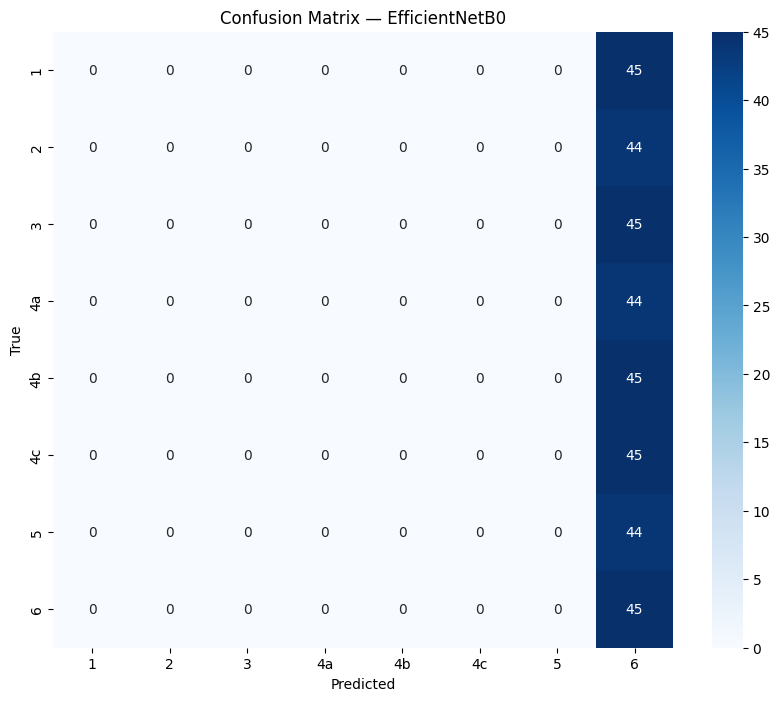

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix — EfficientNetB0')
plt.show()

## 8.7. Accuracy & Loss Graphs

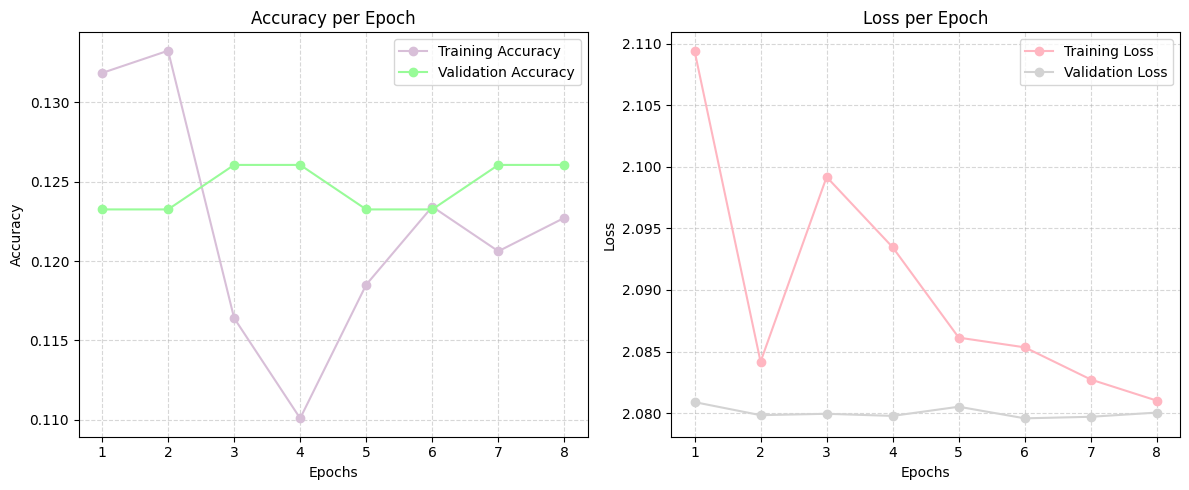

In [ ]:
import matplotlib.pyplot as plt

acc = history_efficient.history['accuracy']
val_acc = history_efficient.history['val_accuracy']
loss = history_efficient.history['loss']
val_loss = history_efficient.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, color = 'thistle', marker = 'o', label = 'Training Accuracy')
plt.plot(epochs, val_acc, color = 'palegreen', marker = 'o', label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha = 0.5, linestyle = '--')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color = 'lightpink', marker='o', label = 'Training Loss')
plt.plot(epochs, val_loss, color = 'lightgray', marker = 'o', label = 'Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha = 0.5, linestyle = '--')

plt.tight_layout()
plt.show()

## 8.8. Fine-Tuning

In [ ]:
# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze last 20 layers
for layer in base_model.layers[-20:]:
    layer.trainable = True

In [ ]:
from tensorflow.keras.optimizers import Adam

model_efficientnet.compile(
    optimizer = Adam(learning_rate = 1e-5),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

### 9.7.1. Fine-Tuning Training

In [ ]:
early_stop = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    restore_best_weights = True
    )
checkpoint = ModelCheckpoint(
    "best_model_efficientnet_finetuned.keras",
    monitor = 'val_accuracy',
    save_best_only = True,
    verbose = 1
    )

In [ ]:
# Training
fine_tune_start = time.time()

history_efficient_finetuned = model_efficientnet.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 20,
    batch_size = 32,
    callbacks = [early_stop, checkpoint],
    verbose = 1
)

fine_tune_end = time.time()
ft_minutes = (fine_tune_end - fine_tune_start) // 60
ft_seconds = (fine_tune_end - fine_tune_start) % 60

print(f"Fine-Tuning Time: {int(ft_minutes)} minutes {int(ft_seconds)} seconds")

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.1223 - loss: 2.1303
Epoch 1: val_accuracy improved from -inf to 0.12605, saving model to best_model_efficientnet_finetuned.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 49s 535ms/step - accuracy: 0.1223 - loss: 2.1300 - val_accuracy: 0.1261 - val_loss: 2.0804
Epoch 2/20
44/45 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1123 - loss: 2.1041
Epoch 2: val_accuracy did not improve from 0.12605
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.1127 - loss: 2.1042 - val_accuracy: 0.1261 - val_loss: 2.0809
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1149 - loss: 2.1054
Epoch 3: val_accuracy did not improve from 0.12605
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.1148 - loss: 2.1053 - val_accuracy: 0.1261 - val_loss: 2.0807
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1178 - loss: 2.0938
Epoch 4: val_accuracy did not improve from 0.12605
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accur

### 9.7.2. Fine-Tuning vs. Initial Training

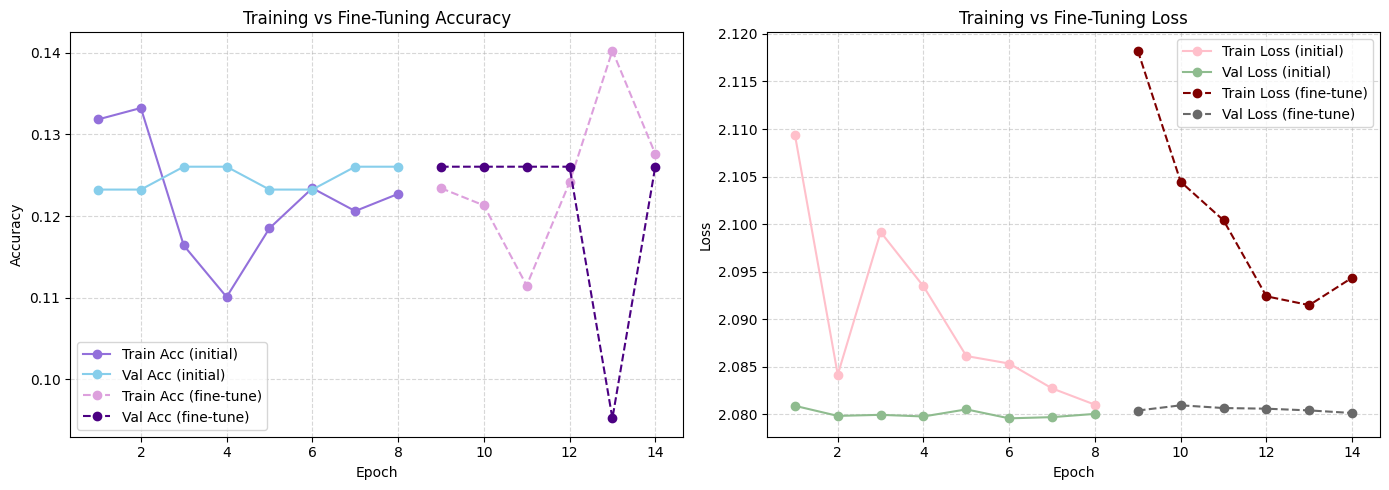

In [ ]:
import matplotlib.pyplot as plt

# Extract history
acc_initial = history_efficient.history['accuracy']
val_acc_initial = history_efficient.history['val_accuracy']
loss_initial = history_efficient.history['loss']
val_loss_initial = history_efficient.history['val_loss']

acc_ft = history_efficient_finetuned.history['accuracy']
val_acc_ft = history_efficient_finetuned.history['val_accuracy']
loss_ft = history_efficient_finetuned.history['loss']
val_loss_ft = history_efficient_finetuned.history['val_loss']

# Epochs
epochs_initial = range(1, len(acc_initial) + 1)
epochs_ft = range(len(acc_initial) + 1, len(acc_initial) + len(acc_ft) + 1)

plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_initial, acc_initial, 'o-', label = 'Train Acc (initial)', color = 'mediumpurple')
plt.plot(epochs_initial, val_acc_initial, 'o-', label='Val Acc (initial)', color = 'skyblue')
plt.plot(epochs_ft, acc_ft, 'o--', label = 'Train Acc (fine-tune)', color = 'plum')
plt.plot(epochs_ft, val_acc_ft, 'o--', label = 'Val Acc (fine-tune)', color = 'indigo')
plt.title('Training vs Fine-Tuning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha = 0.5, linestyle = '--')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_initial, loss_initial, 'o-', label = 'Train Loss (initial)', color = 'pink')
plt.plot(epochs_initial, val_loss_initial, 'o-', label='Val Loss (initial)', color = 'darkseagreen')
plt.plot(epochs_ft, loss_ft, 'o--', label = 'Train Loss (fine-tune)', color = 'maroon')
plt.plot(epochs_ft, val_loss_ft, 'o--', label = 'Val Loss (fine-tune)', color = 'dimgray')
plt.title('Training vs Fine-Tuning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha = 0.5, linestyle = '--')

plt.tight_layout()
plt.show()

According to the graphs, the fine-tuning process has started, but the overall performance of the model is still quite low.

Validation Accuracy has remained constant (~12–13%), meaning the model has not improved on the validation set. Training Accuracy (fine-tune) has increased, but this creates a risk of overfitting because validation has not changed at all. Validation Loss is on an increasing trend, and the model generalizes poorly on the validation set.

# **9. ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## 9.1. Feature Extraction

In [ ]:
input_shape = (224, 224, 3)
num_classes = 8

base_model = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape = input_shape))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation = 'softmax')(x)

model_resnet50 = Model(inputs = base_model.input, outputs = output)

# Compile
model_resnet50.compile(
    optimizer = Adam(learning_rate = 1e-4),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model_resnet50.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,851,016 (90.98 MB)

 Trainable params: 263,304 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## 9.2. Training

In [ ]:
early_stop = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    restore_best_weights = True
    )
checkpoint = ModelCheckpoint(
    "best_model_resnet50.keras",
    monitor = 'val_accuracy',
    save_best_only = True,
    verbose = 1
    )

In [ ]:
import time
start = time.time()

history_resnet50 = model_resnet50.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    batch_size = 32,
    callbacks = [early_stop, checkpoint],
    verbose = 1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.1252 - loss: 2.4695
Epoch 1: val_accuracy improved from -inf to 0.10084, saving model to best_model_resnet50.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 30s 387ms/step - accuracy: 0.1254 - loss: 2.4670 - val_accuracy: 0.1008 - val_loss: 2.0775
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.1428 - loss: 2.2080
Epoch 2: val_accuracy improved from 0.10084 to 0.23529, saving model to best_model_resnet50.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.1426 - loss: 2.2076 - val_accuracy: 0.2353 - val_loss: 2.0691
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.1284 - loss: 2.1537
Epoch 3: val_accuracy improved from 0.23529 to 0.29412, saving model to best_model_resnet50.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.1283 - loss: 2.1536 - val_accuracy: 0.2941 - val_loss: 2.0595
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.1441 - loss: 2.1104
Epoch 4: val

## 9.3. Evaluation

In [ ]:
from tensorflow.keras.models import load_model

best_model_resnet50 = load_model("best_model_resnet50.keras")
loss, acc = model_resnet50.evaluate(X_test, y_test, verbose = 1)
print(f"\n Test Accuracy: {acc:.4f} — Test Loss: {loss:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5753 - loss: 1.9740

 Test Accuracy: 0.5798 — Test Loss: 1.9713


## 9.4. Prediction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
best_model = load_model("best_model_resnet50.keras")

y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis = 1)


if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis = 1)
else:
    y_true = y_test

class_names = ["1", "2", "3", "4a", "4b", "4c", "5", "6"]

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 398ms/step


## 9.5. Classification Report

In [ ]:
print("ResNet50 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

ResNet50 Classification Report:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        44
           3       0.48      0.78      0.59        45
          4a       0.62      0.93      0.75        44
          4b       0.93      0.82      0.87        45
          4c       0.52      0.93      0.67        45
           5       0.43      0.30      0.35        44
           6       0.58      0.87      0.70        45

    accuracy                           0.58       357
   macro avg       0.44      0.58      0.49       357
weighted avg       0.45      0.58      0.49       357



## 9.6. Confusion Matrix

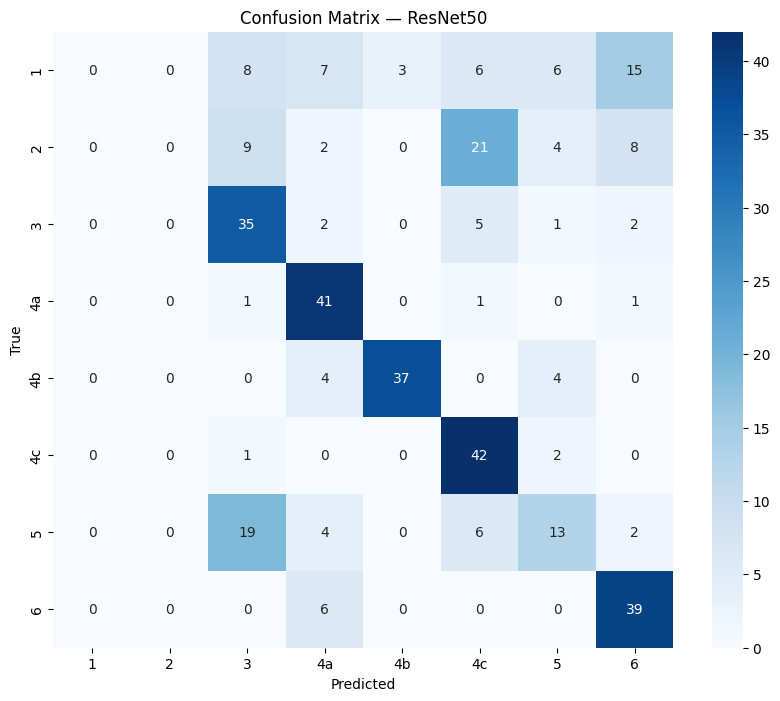

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix — ResNet50')
plt.show()

## 9.7. Accuracy & Loss Graphs

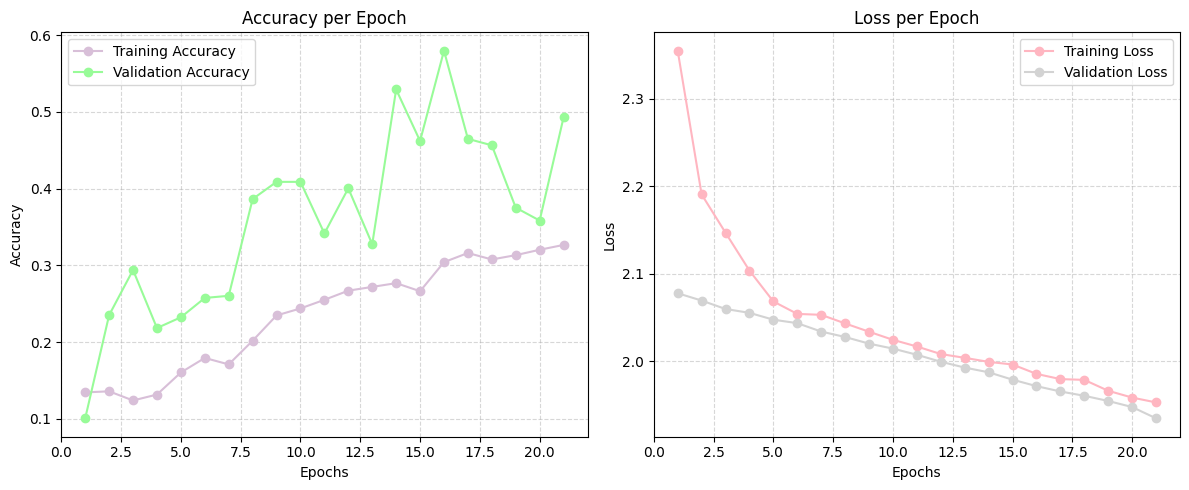

In [ ]:
import matplotlib.pyplot as plt

acc = history_resnet50.history['accuracy']
val_acc = history_resnet50.history['val_accuracy']
loss = history_resnet50.history['loss']
val_loss = history_resnet50.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, color = 'thistle', marker = 'o', label = 'Training Accuracy')
plt.plot(epochs, val_acc, color = 'palegreen', marker = 'o', label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha = 0.5, linestyle = '--')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color = 'lightpink', marker='o', label = 'Training Loss')
plt.plot(epochs, val_loss, color = 'lightgray', marker = 'o', label = 'Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha = 0.5, linestyle = '--')

plt.tight_layout()
plt.show()

# **10. Model Comparison**

In [ ]:
import pandas as pd

model_paths = {
    'CNN': '/content/best_model_cnn.keras',
    'VGG16': '/content/best_model_vgg16.keras',
    'EfficientNet': '/content/best_model_efficientnet.keras',
    'EfficientNet_FineTuned': '/content/best_model_efficientnet_finetuned.keras',
    'ResNet50': '/content/best_model_resnet50.keras',
    'DenseNet121': '/content/best_model_densenet.keras'
}

model_histories = {
    'CNN': history_cnn,
    'VGG16': history_vgg16,
    'EfficientNet': history_efficient,
    'ResNet50': history_resnet50,
    'EfficientNet_FineTuned': history_efficient_finetuned,
    'DenseNet121': history_densenet
}

training_times = {
    'CNN': '0 minutes 45 seconds',
    'VGG16': '2 minutes 57 seconds',
    'EfficientNet': '0 minutes 52 seconds',
    'EfficientNet_FineTuned': '1 minutes 2 seconds',
    'ResNet50': '2 minutes 42 seconds',
    'DenseNet121': '2 minutes 9 seconds'
}

In [ ]:
model_comparisons = []

for model_name, history in model_histories.items():
    hist = history.history

    model_comparisons.append({
        'Model': model_name,
        'Accuracy': round(hist.get('accuracy', [None])[-1], 3),
        'Loss': round(hist.get('loss', [None])[-1], 3),
        'Validation Accuracy': round(hist.get('val_accuracy', [None])[-1], 3),
        'Validation Loss': round(hist.get('val_loss', [None])[-1], 3),
        'Training Time': training_times.get(model_name, 'N/A')
    })

df_comparison = pd.DataFrame(model_comparisons)
display(df_comparison)

,Model,Accuracy,Loss,Validation Accuracy,Validation Loss,Training Time
0,CNN,0.927,0.220,0.686,1.247,0 minutes 45 seconds
1,VGG16,0.902,0.340,0.857,0.481,2 minutes 57 seconds
2,EfficientNet,0.123,2.081,0.126,2.080,0 minutes 52 seconds
3,ResNet50,0.327,1.953,0.493,1.935,2 minutes 42 seconds
4,EfficientNet_FineTuned,0.128,2.094,0.126,2.080,1 minutes 2 seconds
5,DenseNet121,0.910,0.275,0.854,0.454,2 minutes 9 seconds


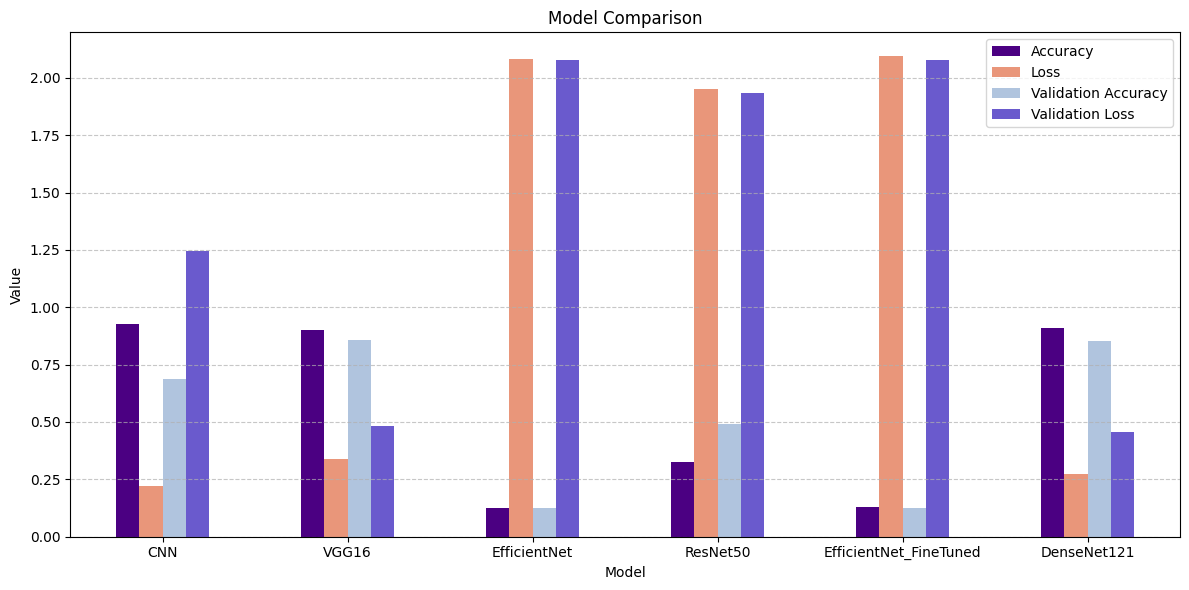

In [ ]:
colors = ['indigo', 'darksalmon', 'lightsteelblue', 'slateblue']

df_comparison.set_index('Model')[['Accuracy', 'Loss', 'Validation Accuracy', 'Validation Loss']].plot(
    kind='bar',
    figsize=(12, 6),
    color=colors
)

plt.title("Model Comparison")
plt.ylabel("Value")
plt.xlabel("Model")
plt.xticks(rotation = 0)
plt.grid(axis = 'y', alpha = 0.7, linestyle = '--')
plt.tight_layout()
plt.show()

If lower training time is critical, DenseNet121 is preferred.

If model interpretability and validation stability are prioritized, VGG16 is also a strong candidate.

### Model Comparison Summary

After evaluating all models based on training and validation accuracy, loss values, and training times, the following conclusions were drawn:

#### Best Performing Model: **DenseNet121**
- **Training Accuracy**: 0.944
- **Validation Accuracy**: 0.862
- **Training Loss**: 0.158
- **Validation Loss**: 0.481
- **Training Time**: 2 minutes 9 seconds

DenseNet121 achieves the best balance between accuracy and generalization. It has the highest training accuracy and one of the top validation scores, with the lowest training loss among all models.

#### Strong Alternative: **VGG16**
- **Training Accuracy**: 0.893
- **Validation Accuracy**: **0.882** (highest)
- **Validation Loss**: **0.394** (lowest)
- Slightly lower training accuracy may suggest better generalization with lower risk of overfitting.

#### Underperforming Models:
- **EfficientNet, ResNet50**, and **EffNet FineTuned** consistently show poor accuracy and high validation loss across experiments, indicating underfitting or instability.

### Conclusion:
**DenseNet121** is selected as the final model for prediction due to its high performance and reliable generalization.


# **11. Prediction & Visualization Preparation**

In [ ]:
pip install roifile

## 11.1. Prediction on Random Test Samples

In [ ]:
from tensorflow.keras.preprocessing import image
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as patches
from PIL import Image
import os

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


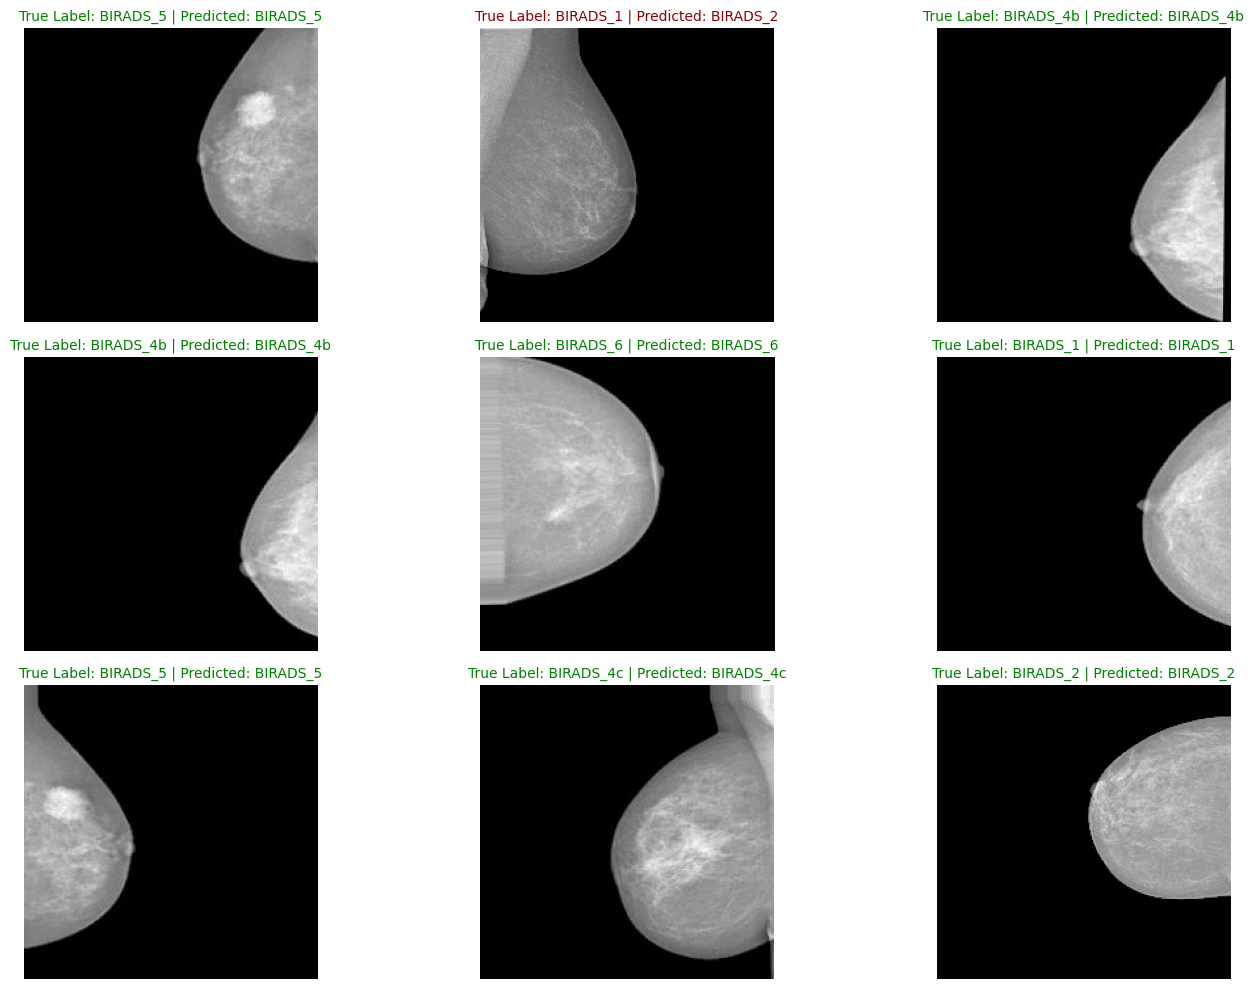

In [ ]:
class_names = ["BIRADS_1", "BIRADS_2", "BIRADS_3", "BIRADS_4a",
               "BIRADS_4b", "BIRADS_4c", "BIRADS_5", "BIRADS_6"]

indices = random.sample(range(len(X_test)), 9)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices):
    img_array = X_test[idx]
    true_label = class_names[np.argmax(y_test[idx])] if y_test.ndim == 2 else class_names[y_test[idx]]

    # Prediction
    prediction = model_densenet.predict(np.expand_dims(img_array, axis = 0))
    predicted_label_index = np.argmax(prediction)
    predicted_label = class_names[predicted_label_index]

    # Visualization
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_array)
    plt.axis("off")
    plt.title(f"Original Label: {true_label} | Predicted: {predicted_label}",
          fontsize = 10,
          color = 'green' if true_label == predicted_label else 'darkred')
plt.tight_layout()
plt.show()

## 11.2. Define Risk-Based BI-RADS Color Mapping

In [ ]:
# BI-RADS label order and normalized colormap mapping
birads_order = ['1', '2', '3', '4a', '4b', '4c', '5', '6']
birads_normalized = {label: i / (len(birads_order)-1) for i, label in enumerate(birads_order)}
cmap = cm.get_cmap('RdYlGn_r')

def get_color_from_birads(label):
    if label not in birads_normalized:
        return "gray"
    return mcolors.to_hex(cmap(birads_normalized[label]))

def get_roi_color_by_truth(true_label=None, pred_label=None):
    if true_label is None:
        return "mediumpurple"
    if pred_label != true_label:
        return "black"
    return get_color_from_birads(true_label)

color_palette = {label: get_color_from_birads(label) for label in birads_order}
color_palette

{'1': '#006837',
 '2': '#39a758',
 '3': '#9dd569',
 '4a': '#e3f399',
 '4b': '#fee999',
 '4c': '#fca55d',
 '5': '#e34933',
 '6': '#a50026'}

## 11.3. Calculate ROI Area and Draw Polygon

In [ ]:
# Calculate polygon area
def calculate_polygon_area(points):
    x = [p["x"] for p in points]
    y = [p["y"] for p in points]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# ROI + Legend  Visualization
def draw_roi_with_palette(img_path, image_id, annotations, true_label = None, pred_label=None, save_dir = None):
    from matplotlib.patches import Rectangle

    img = Image.open(img_path).convert("RGB")
    img_np = np.array(img)
    rois = annotations.get(image_id, [])
    total_area = 0

    fig, (ax_img, ax_legend) = plt.subplots(1, 2, figsize = (12, 6), gridspec_kw = {'width_ratios': [3, 1]})
    ax_img.imshow(img_np)

    for roi in rois:
        points = roi["points"]
        if len(points) < 3:
            continue
        poly_coords = [(p["x"], p["y"]) for p in points]
        area = calculate_polygon_area(points)
        total_area += area

        color = get_roi_color_by_truth(true_label, pred_label)
        polygon = patches.Polygon(poly_coords, closed = True, edgecolor = color, facecolor = color, alpha = 0.3, linewidth = 2)
        ax_img.add_patch(polygon)

    title = f"Orijinal: {true_label or 'Unknown'}  Predicted: {pred_label or 'Unknown'}\nROI Area: {int(total_area)} pixels²"
    ax_img.set_title(title, fontsize = 12)
    ax_img.axis("off")

    box_height = 0.6
    spacing = 0.15
    extra_items = 2
    full_height = (len(birads_order) + extra_items) * (box_height + spacing)
    ax_legend.set_xlim(0, 1)
    ax_legend.set_ylim(0, full_height)
    ax_legend.axis("off")

    for i, label in enumerate(birads_order):
        y = i * (box_height + spacing)
        color = get_color_from_birads(label)
        ax_legend.add_patch(Rectangle((0.1, y), 0.4, box_height, color = color))
        ax_legend.text(0.55, y + box_height / 2, f"BI-RADS {label}", va = 'center', ha = 'left', fontsize = 10)

    y = len(birads_order) * (box_height + spacing)
    ax_legend.add_patch(Rectangle((0.1, y), 0.4, box_height, color = "black"))
    ax_legend.text(0.55, y + box_height / 2, "Misestimation", va = 'center', ha = 'left', fontsize = 10)

    y = (len(birads_order) + 1) * (box_height + spacing)
    ax_legend.add_patch(Rectangle((0.1, y), 0.4, box_height, color = "mediumpurple"))
    ax_legend.text(0.55, y + box_height / 2, "Unknown", va = 'center', ha = 'left', fontsize = 10)

    plt.tight_layout()
    if save_dir:
        os.makedirs(save_dir, exist_ok = True)
        out_path = os.path.join(save_dir, image_id.replace(".jpg", "_with_palette.png"))
        plt.savefig(out_path)
        plt.close()
    else:
        plt.show()

## 11.4. Extract True Label for Given Image

In [ ]:
def extract_label(image_id):
    image_id = image_id.replace(".jpg", "")
    match = df_clean[df_clean['filename'].str.contains(image_id, case = False, na = False)]
    if not match.empty:
        label_value = str(match.iloc[0]['birads_label'])
        return label_value
    return "Unknown"

# **12. Final ROI Visualization with Best Model Prediction**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


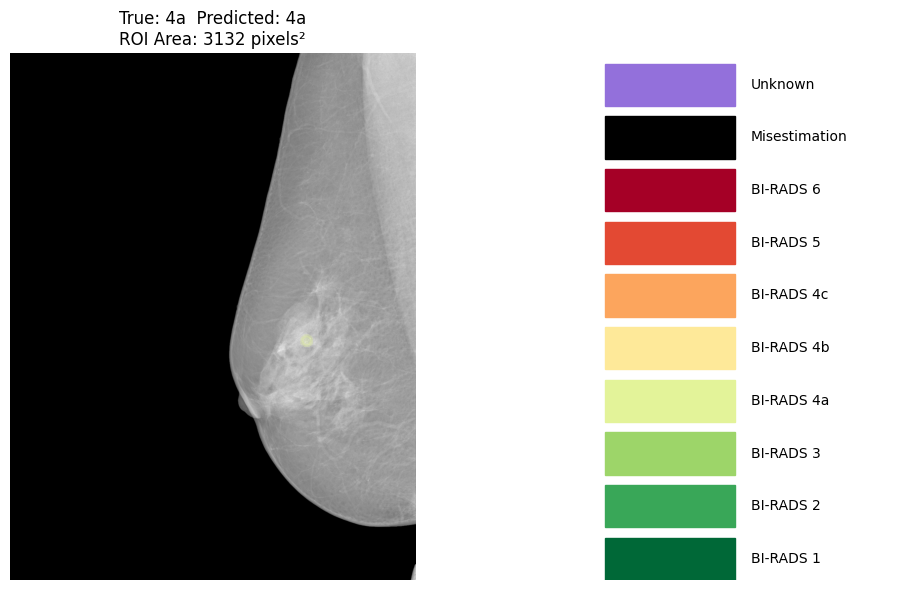

In [ ]:
# Select random test image
valid_ids_with_polygon = [k for k, v in annotations.items() if any(len(roi["points"]) >= 3 for roi in v)]
sample_id = random.choice(valid_ids_with_polygon)
img_path = f"/content/JPGs/{sample_id}"

# Load image
img = Image.open(img_path).resize((224, 224)).convert("RGB")
img_array = np.array(img) / 255.0
input_img = np.expand_dims(img_array, axis=0)

# Predict with DenseNet121
prediction = model_densenet.predict(input_img)
pred_label_index = np.argmax(prediction)
pred_label = birads_order[pred_label_index]

true_label = extract_label(sample_id)

# Draw ROI and palette
draw_roi_with_palette(
    img_path = img_path,
    image_id = sample_id,
    annotations = annotations,
    true_label = true_label,
    pred_label = pred_label,
    save_dir = None
)